In [2]:
import pandas as pd
import numpy as np
%pylab inline

pump_data = pd.read_csv('pump_training_data.csv')
pump_status = pd.read_csv('pump_status_group.csv')

pump_data[['management_group', 'ward', 'recorded_by']][:5]

Populating the interactive namespace from numpy and matplotlib


,management_group,ward,recorded_by
0,user-group,Mundindi,GeoData Consultants Ltd
1,user-group,Natta,GeoData Consultants Ltd
2,user-group,Ngorika,GeoData Consultants Ltd
3,user-group,Nanyumbu,GeoData Consultants Ltd
4,other,Nyakasimbi,GeoData Consultants Ltd


In [33]:
# pump_status[:5]
print pumps.ward.unique()

# print pump_data.source.unique()
# print pump_data.source_type.unique()
for x in pumps.columns.values:
    print x, len(pumps[x].unique())

['Mundindi' 'Natta' 'Ngorika' ..., 'Chinugulu' 'Nyamtinga' 'Kinungu']
id 59400
amount_tsh 98
funder 1898
gps_height 2428
installer 2146
longitude 57516
latitude 57517
num_private 65
basin 9
region 21
region_code 27
district_code 20
lga 125
ward 2092
population 1049
public_meeting 3
recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
construction_year 55
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6
yr_recorded 5
status_group 3


In [4]:
pump_data['yr_recorded'] = pump_data['date_recorded'].apply(lambda x: x.split('-')[0])
pump_data['yr_recorded'][:10]

0    2011
1    2013
2    2013
3    2013
4    2011
5    2011
6    2012
7    2012
8    2012
9    2011
Name: yr_recorded, dtype: object

In [5]:
pumps = pd.merge(pump_data, pump_status,
                 left_on='id',
                 right_on='id')
pumps[:5]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,yr_recorded,status_group
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,functional
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,functional
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,functional
3,67743,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,non functional
4,19728,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,functional


In [6]:
# quantity_group exactly the same as quantity
# wpt name is just the name of the pump, irrelevant
# subvillage has almost 20,000 unique values, the most of which shows up 500 times in 60,000
pumps = pumps.drop(['date_recorded', 'quantity_group','wpt_name', 'subvillage'], axis=1)
pumps.columns.values

array(['id', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'yr_recorded', 'status_group'], dtype=object)

In [7]:
# for name, group in funder:
#     print 'mean longitude for ', name, ' is ', group['longitude'].mean()
#     print 'mean latitude for ', name, ' is ', group['latitude'].mean()

In [8]:
pumps['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
dtype: int64

In [9]:
# array(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
#        'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
#        'basin', 'subvillage', 'region', 'region_code', 'district_code',
#        'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
#        'scheme_management', 'scheme_name', 'permit', 'construction_year',
#        'extraction_type', 'extraction_type_group', 'extraction_type_class',
#        'management', 'management_group', 'payment', 'payment_type',
#        'water_quality', 'quality_group', 'quantity', 'source',
#        'source_type', 'source_class', 'waterpoint_type',
#        'waterpoint_type_group'], dtype=object)

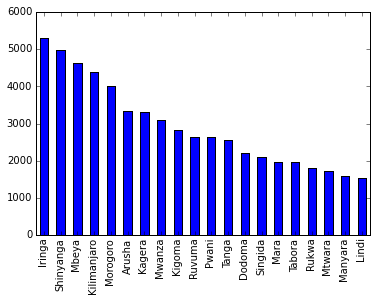

In [10]:
pumps['region'].value_counts()[:20].plot(kind='bar')

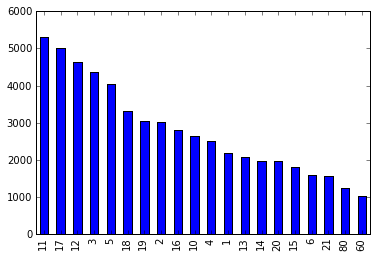

In [11]:
pumps['region_code'].value_counts()[:20].plot(kind='bar')


In [12]:
import statsmodels.api as sm

# logit = sm.Logit(pumps['status_group'], pumps[pumps.columns[1:-1]])
# result = logit.fit()

# result.summary()

# y = pumps['status_group']
# x = pumps[pumps.columns[1:-1]].ix[:,:]

# logit = sm.MNLogit(y, x)
# result = logit.fit()

# result.summary()

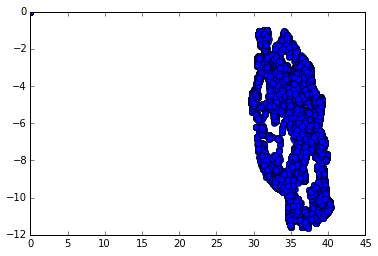

In [13]:
plot(pumps['longitude'], pumps['latitude'], marker='o', color='blue', linestyle='None')

In [14]:
dummy_stats = pd.get_dummies(pumps['status_group'])
dummy_stats[:5]

,functional,functional needs repair,non functional
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [15]:
y = pumps['status_group']
x = pumps[['longitude', 'latitude']]

logit = sm.MNLogit(y, x)
result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.885649
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:           status_group   No. Observations:                59400
Model:                        MNLogit   Df Residuals:                    59396
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Nov 2015   Pseudo R-squ.:                0.004452
Time:                        21:50:40   Log-Likelihood:                -52608.
converged:                       True   LL-Null:                       -52843.
                                        LLR p-value:                6.742e-103
===============================================================================================
status_group=functional needs repair       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
longitude                               -0.0601      0.001    -52.152      0.000        -0.062    -0.058
latitude                                -0.0023      0.006     -0.371      0.711        -0.015     0.010
--------------------------------------------------------------------------------------------------------
status_group=non functional       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
longitude                      -0.0118      0.001    -19.759      0.000        -0.013    -0.011
latitude                       -0.0128      0.003     -3.971      0.000        -0.019    -0.006
===============================================================================================
"""

In [16]:
len(pumps['source_type'].unique())

7

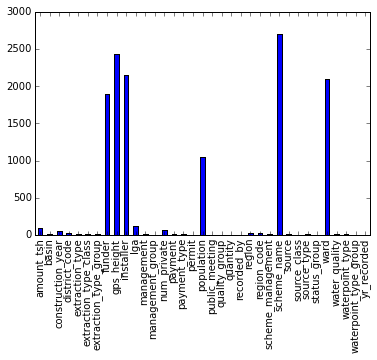

In [17]:
unique_dict = {x:len(pumps[x].unique()) for x in pumps.columns if x not in ['id', 'latitude', 'longitude']}
pd.Series(unique_dict).plot(kind='bar')

In [18]:
pumps.corr()


# region_code, district_code should be categorical

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [19]:
num_col = [x for x in pumps.corr().columns.values if x!='region_code' and x!='district_code' and x!='id']
num_col

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'construction_year']

In [20]:
non_num = [x for x in pumps.columns.values if x not in num_col and x!='id']
non_num

['funder',
 'installer',
 'basin',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'yr_recorded',
 'status_group']

In [21]:
mask_no_yr = (pumps['construction_year']==0)
pumps.loc[mask_no_yr, 'construction_year'] = np.nan

In [22]:
mask_no_yr = (pumps['num_private']==0)
len(pumps[mask_no_yr])

58643

In [23]:
pumps.groupby('installer')[['amount_tsh']].mean().sort('amount_tsh', ascending=False)[:5]

,amount_tsh
installer,
lutheran church,89000
Secondary school,25000
secondary school,20500
COMPASION INTERNATIO,15000
secondary,12000


In [24]:
len(pumps.installer.unique())

2146

In [25]:
# y = install_dum['status_group']
# x = install_dum[[x for x in install_dum.columns.values if x[:10]=='installer_']]

# logit = sm.MNLogit(y, x)
# result = logit.fit()

# result.summary()

In [26]:
# [x for x in pumps.columns.values if x[:10]=='installer_']

In [27]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print(edit_distance("Helloworld", "HalloWorld"))

2


In [28]:
df = pd.read_csv('training_clean_dan.csv')
df.columns.values

array(['Unnamed: 0', 'date_recorded', 'funder', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'population',
       'permit', 'construction_year', 'extraction_type', 'management',
       'payment', 'quantity', 'source_type', 'waterpoint_type'], dtype=object)

In [37]:
df.shape

str

In [39]:
typos = {}

for col in pumps.columns.values:
    print col
    if type(pumps.loc[3, col])==type(' '):
        close_levels = []
        unq = pumps[col].unique()
        for level1 in unq:
            for level2 in unq:
                if edit_distance(str(level1), str(level2)) < 5:
                    close_levels.append((level1, level2))
        typos[col] = close_levels
    else:
        continue
    
typos

id
amount_tsh
funder


KeyboardInterrupt: 

In [41]:
close_levels = []
unq = pumps['ward'].unique()
for level1 in unq:
    for level2 in unq:
        if edit_distance(str(level1), str(level2)) < 3:
            close_levels.append((level1, level2))
close_levels

[('Mundindi', 'Mundindi'),
 ('Natta', 'Natta'),
 ('Natta', 'Nala'),
 ('Natta', 'Nanga'),
 ('Natta', 'Nata'),
 ('Natta', 'Wotta'),
 ('Natta', 'Lalta'),
 ('Natta', 'Naputa'),
 ('Ngorika', 'Ngorika'),
 ('Ngorika', 'Ngofila'),
 ('Ngorika', 'Nguruka'),
 ('Nanyumbu', 'Nanyumbu'),
 ('Nanyumbu', 'Naumbu'),
 ('Nanyumbu', 'Nanyamba'),
 ('Nyakasimbi', 'Nyakasimbi'),
 ('Moa', 'Moa'),
 ('Moa', 'Msia'),
 ('Moa', 'Mogwa'),
 ('Moa', 'Doma'),
 ('Moa', 'Gua'),
 ('Moa', 'Soga'),
 ('Moa', 'Mkoma'),
 ('Moa', 'Mima'),
 ('Moa', 'Mtae'),
 ('Moa', 'Mtoa'),
 ('Moa', 'Sopa'),
 ('Moa', 'Mtua'),
 ('Moa', 'Daa'),
 ('Moa', 'Mlowa'),
 ('Moa', 'Goba'),
 ('Moa', 'Mlola'),
 ('Moa', 'Mkoka'),
 ('Moa', 'Musa'),
 ('Moa', 'Loya'),
 ('Moa', 'Mofu'),
 ('Moa', 'Moita'),
 ('Moa', 'Boma'),
 ('Samuye', 'Samuye'),
 ('Chambo', 'Chambo'),
 ('Chambo', 'Urambo'),
 ('Chambo', 'Chumbi'),
 ('Chambo', 'Mgambo'),
 ('Chambo', 'Bwambo'),
 ('Chambo', 'Chumo'),
 ('Chambo', 'Chemba'),
 ('Chambo', 'Chato'),
 ('Itetemia', 'Itetemia'),
 ('Itetemia

In [42]:
pumps.ward.value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
Mishamo             203
Kitunda             203
Msindo              201
Chalinze            196
Maji ya Chai        190
Usuka               187
Ngarenanyuki        172
Chanika             171
Vikindu             162
Mtwango             153
Matola              145
Zinga/Ikerege       141
Wanging'ombe        139
Maramba             139
Itete               137
Magomeni            135
Ifakara             134
Kikatiti            134
Olkokola            133
Maposeni            130
Igongolo            129
Mvomero             129
Mlangali            125
Nkoma               122
Nkungulu            121
                   ... 
Themi                 1
Igogo                 1
Nyamtinga             1
Uwanja wa Ndege       1
Ikweha                1
Matarawe              1
Mitole                1
Kitete                1
Mawenzi               1
Thawi                 1
Simbay          